In [3]:
%reload_ext autoreload
%autoreload 2

import function as func
from ellipsoid_mirror import *
from read_simulation import *
# scipyのintegrateをインポート
from scipy import integrate

np.set_printoptions(threshold=20)

plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [30]:
def func1(r, sigma):
    return r/np.sqrt(1. + r*r) * np.exp( - np.power( np.arctan(r), 2 ) / (4. * sigma*sigma) )

def calc_integral_func1(sigma = 1., r_max=100.):
    r_min = 0.
    ans, err = integrate.quad( func1, r_min, r_max, args=(sigma) )
    return ans, err

[1000. 1000. 1000. ... 1000. 1000. 1000.]


<ErrorbarContainer object of 3 artists>

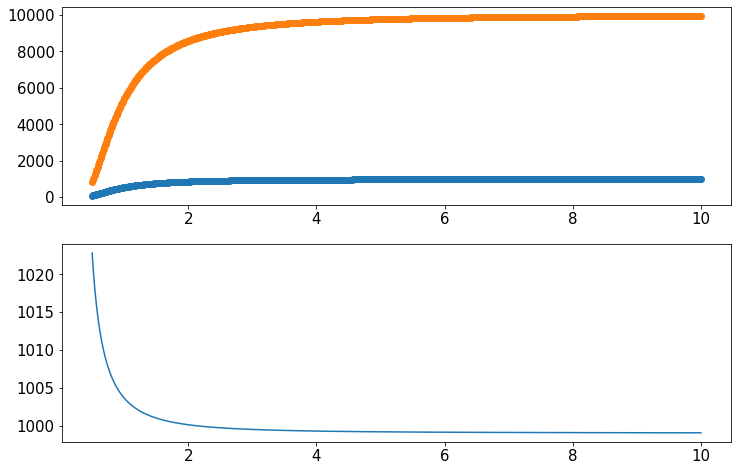

In [97]:
##### sigma_list = np.arange(1, 101, 1)
sigma_list = np.linspace(0.5, 10, 1000)
r_max_list = np.full(sigma_list.shape, 1000.)
#r_max_list = 1000 * sigma_list
print(r_max_list)
ans_list = []
err_list = []
for (_s, _r) in zip(sigma_list, r_max_list):
    _a, _e = calc_integral_func1( _s, _r )
    ans_list.append( _a )
    err_list.append( _e )
    pass

fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].scatter(sigma_list, ans_list)
a = 0.616
axs[0].scatter(sigma_list, 10000* np.exp( - a/(sigma_list*sigma_list)) )
#axs[1].errorbar(sigma_list, ans_list/sigma_list, err_list/sigma_list, ls='', markersize=2, marker='o')
axs[1].errorbar(sigma_list, ans_list/np.exp( - a/(sigma_list*sigma_list)))

In [48]:
def func2(r, sigma):
    return r/(1. + r*r) * np.exp( - np.power( np.arctan(r), 2 ) / (2. * sigma*sigma) )

def calc_integral_func2(sigma = 1., r_max=100.):
    r_min = 0.
    ans, err = integrate.quad( func2, r_min, r_max, args=(sigma) )
    return ans, err

[  100000.           301010.1010101    502020.2020202  ...
 19597979.79797979 19798989.8989899  20000000.        ]


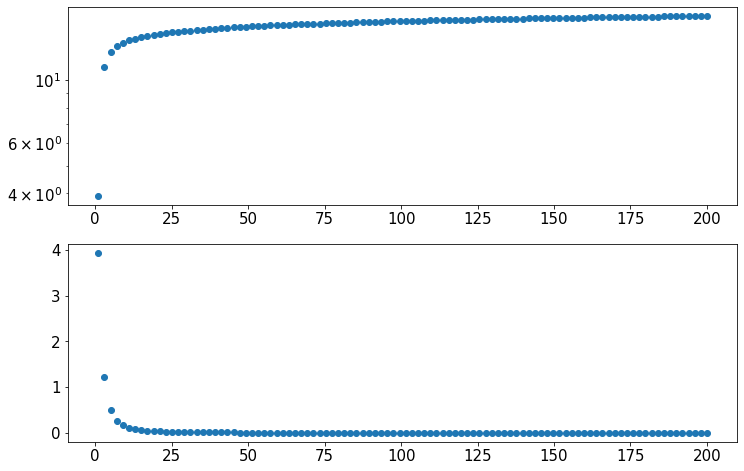

In [61]:
#sigma_list = np.arange(1, 101, 1)
sigma_list = np.linspace(1, 200, 100)
#r_max_list = np.full(sigma_list.shape, 100000.)
r_max_list = 100000 * sigma_list
print(r_max_list)
ans_list = []
err_list = []
for (_s, _r) in zip(sigma_list, r_max_list):
    _a, _e = calc_integral_func2( _s, _r )
    ans_list.append( _a )
    err_list.append( _e )
    pass

fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].scatter(sigma_list, ans_list)
axs[0].set_yscale('log')
#axs[1].errorbar(sigma_list, ans_list/sigma_list, err_list/sigma_list, ls='', markersize=2, marker='o')
axs[1].scatter(sigma_list, ans_list/np.power(sigma_list, 2.))

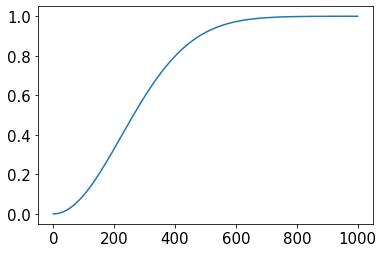

In [65]:
x = np.linspace(0, 1000, 1000)
plt.plot(x, (1 - np.exp( -x*x*1e-5 )) )

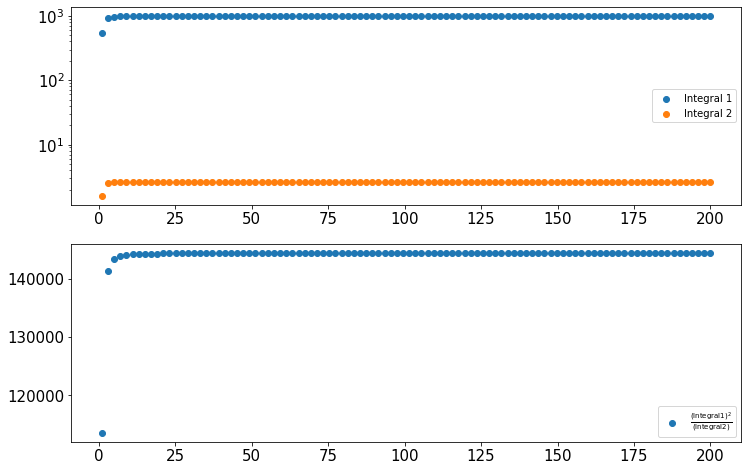

In [112]:
#sigma_list = np.arange(1, 101, 1)
sigma_list = np.linspace(1, 200, 100)
r_max_list = np.full(sigma_list.shape, 1e+3)
i1_list = []
i2_list = []
err1_list = []
err2_list = []
S_list = []
for (_s, _r) in zip(sigma_list, r_max_list):
    _i1, _e1 = calc_integral_func1( _s, _r) 
    _i2, _e2 = calc_integral_func2( _s, _r)
    i1_list.append( _i1 )
    err1_list.append( _e1 )
    i2_list.append( _i2 )
    err2_list.append( _e2 )
    S_list.append( _i1*_i1 / _i2 )
    pass
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].scatter(sigma_list, i1_list, label='Integral 1')
axs[0].scatter(sigma_list, np.sqrt(i2_list), label='Integral 2')
axs[0].set_yscale('log')
axs[0].legend()

axs[1].scatter(sigma_list, S_list, label=r'$\frac{\rm (Integral 1)^2}{\rm (Integral 2)}$')
axs[1].legend()